# EC_01_Volcanic_activity_detection_and_noise_characterization_using_machine learning 


## Author(s)


- Author1 = {"name": "Myles Mason", "affiliation": "Virginia Tech", "email": "mylesm18@vt.edu", "orcid": "0000-0002-8811-8294"}
- Author2 = {"name": "John Wenskovitch", "affiliation": "Virginia Tech", "email": "jw87@vt.edu", "orcid": "0000-0002-0573-6442"}
- Author3 = {"name": "D. Sarah Stamps", "affiliation": "Virginia Tech", "email": "dstamps@vt.edu","orcid": "0000-0002-3531-1752"}
- Author4 = {"name": "Joshua Robert Jones", "affiliation": "Virginia Tech", "email": "joshj55@vt.edu", "orcid": "0000-0002-6078-4287"}

    

## Purpose

This Jupyter notebook aims to explore methods towards characterizing noise and eventually predicting volcanic activity for Ol Doinyo Lengai (a volcano in Tanzania) with machine learning. Machine learning is a powerful tool that enables the automatization of complex mathematical and analytical models. In the case of this Jupyter notebook, the components are height, latitude, and longitude. The predicted component values are the next heights. This project uses Global Navigation Satellite System  (GNSS) data from the EarthCube CHORDS portal TZVOLCANO (Stamps et al. 2016), which is the online interface for obtaining open-access real-time positioning data collected around Ol Doinyo Lengai (http://tzvolcano.chordsrt.com).

## Technical contributions
- The training of the models and anaylze uses basic Linear Albera and stastics 
- The main libraries used (numpy and pandas) are both libraries for data manipulation and linear algebra 
- The CHORDS site linked above is the location of the data and the interface of CHORDS

## Methodology
1.) Data collection
2.) Data pre processing
3.) Input data for Linear Regression model
4.) Increase sample size of inputs for the model
5.) Compare predictions to actual data

The data being anaylzed is from the first station labled as OLO1. The two JSON imports for the data are from 12/06/2020 and 04/16/2021. These specific days were choosen because the date seperation is four months which allows for variation in the data.
First I went through the data pre processing steps after I received the data from the CHORDS API. After receiving the data basic exploration's were completed to see if Linear Regression models could be used. For my first model the a 4x21 dataframe was used for the Linear Regression. For the next model a 2000x20 dataframe was used for more data point. 


## Results
Describe and comment on the most important results. Include images and URLs as necessary. 

## Funding

- Award1 = {"agency": "National Science Foundation EarthCube Program", "award_code": "1639554", "award_URL": "https://www.nsf.gov/awardsearch/showAward?AWD_ID=1639554&HistoricalAwards=false"}
- Award2 = {"agency": "Virginia Tech Academy of Integrated Sciences Hamlett Undergraduate Research Award", "award_code": "44672", "award_URL": "award_URL"}

## Keywords
Include up to 5 keywords, using the template below.

keywords=["tzDF", "LinearRegression", "Concat", "Transpose"]

## Citation
Include recommended citation for the notebook.
#cite machine learning

## Work In Progress - improvements
* leave blank
# mention things like generating sysnthetic data that will mimic volcanic activity
Notable TODOs:
# Talk about how the existing work will lead me to predict volcanic activity
- todo 1;
- todo 2;

## Suggested next steps
Next steps for this notebook will be increasing the inputs for the prediction model. More anaylsis on the noise will be a crucial point in the next step for further volcanic activity prediciton. Specifically generating sysnthetic data that will mimic volcanic activity.
## Acknowledgements 
Include any relevant acknowledgements, apart from funding (which was in section 1.6)


# Setup

## Library import


In [1]:
# Data manipulation
import pandas as pd
import json
import numpy as np
from datetime import datetime as dt

# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



## Local library import
Import all the required local libraries.


In [2]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries

# Parameter definitions
tzDF: intial dataframe contains 12/06/2020 data 
tzDF_two: secondary dataframe contains 04/16/2021 data

# map to the function 
#talk about the data in the dataframe specilll the data in the data frame
Dataframe - 


# Data import


The CHORDS notebook portal is where the data is acessed.

In [3]:
#Import for JSON files for manipulation
''' Both files are station one, but the first date is December 16,2020
    while the second date is April 16 2021.
'''
with open('OLO1_12_16_20.geojson', 'r', encoding="utf-8") as infile:
    tzList = json.load(infile)

with open('OLO1_4_16_21.geojson', 'r', encoding="utf-8") as infile:
    tz2List = json.load(infile)

# Data processing and analysis


In [4]:
#Convert both JSON's into  a partially-flattened pandas DataFrame   
tzDF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
tz2DF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
tzDF.describe()

,measurements_lat,measurements_height,measurements_lon
count,5.990000e+03,5990.000000,5.990000e+03
mean,2.734205e+00,988.153415,3.595022e+01
std,2.869056e-13,0.020116,1.547341e-07
min,2.734205e+00,988.095000,3.595022e+01
25%,2.734205e+00,988.139000,3.595022e+01
50%,2.734205e+00,988.152000,3.595022e+01
75%,2.734205e+00,988.167000,3.595022e+01
max,2.734205e+00,988.226000,3.595022e+01


Function to convert timestamp coulmn of tzDF and tz2DF from timeseries to an integer for easy manipulation.

In [5]:
def timeconvertfunc(timestamp):
 #The format of tzDF["measurments_height] is in string form and timeseries so this method make it an integer"
  ts = pd.Timestamp(timestamp, tz=None).to_pydatetime()
  ts = 3600*ts.hour + 60*ts.minute + ts.second

  return ts
#Applying above method to the two data frames
tzDF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)
tz2DF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)

# Visulization of basic stastics from measurements_height and linear regression

In the code block below the four series objects are partions of the measurments_height column in the tzDF dataframe. We create these partions to feed into a Linear Regression model for predictions.

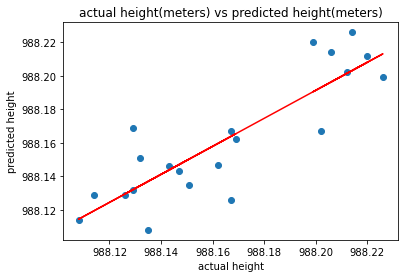

This is the b value [[0.83655979]]
This is the m value [161.50298089]
This is the R^2 0.7395011512205776


In [6]:
#From the first
one_Through_Twenty = tzDF["measurements_height"].loc[1:21].values.reshape(-1,1)
two_Through_Twenty_One= tzDF["measurements_height"].loc[2:22].values.reshape(-1,1)
three_Through_Twenty_Two =tzDF["measurements_height"].loc[3:23].values.reshape(-1,1)
four_Through_Twenty_Four = tzDF["measurements_height"].loc[4:24].values.reshape(-1,1)

#Linear Regression model on columns 1-20 and 2-21

lm = LinearRegression()
lm.fit(one_Through_Twenty ,two_Through_Twenty_One)
y_pred = lm.predict(one_Through_Twenty)
plt.xlabel("actual height")
plt.ylabel("predicted height")
plt.title("actual height(meters) vs predicted height(meters)")
plt.scatter(one_Through_Twenty,two_Through_Twenty_One)
plt.plot(one_Through_Twenty,y_pred,color="red")
plt.show()

print("This is the b value",lm.coef_,)

print("This is the m value",lm.intercept_)
print("This is the R^2",lm.score(one_Through_Twenty,two_Through_Twenty_One))




From the above model with using the first through twentith column and second through twenty second column we yeild a Coefficent of Correlation (R^2) value of about 0.73 which shows positive correlation between the two inputs. So about 37% of varition is residing in the residual.

## two_through_Twenty_One and three_through_Twenty_Two

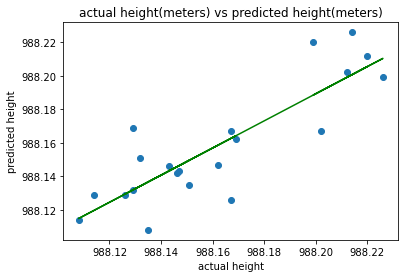

This is the b value [[0.81020583]]
This is the m value [187.5439221]
This is the R^2 0.7256865812125708


In [7]:

lm1 = LinearRegression()
lm1.fit(two_Through_Twenty_One ,three_Through_Twenty_Two)
y_pred1 = lm1.predict(two_Through_Twenty_One)
plt.scatter(two_Through_Twenty_One,three_Through_Twenty_Two)
plt.plot(two_Through_Twenty_One,y_pred1,color="green")
plt.xlabel("actual height")
plt.ylabel("predicted height")
plt.title("actual height(meters) vs predicted height(meters)")
plt.show()
print("This is the b value",lm1.coef_,)
print("This is the m value",lm1.intercept_)
print("This is the R^2",lm1.score(two_Through_Twenty_One,three_Through_Twenty_Two))

From the above model with using the first through twentith column and second through twenty second column we yeild a Coefficent of Correlation (R^2) value of about 0.72 which shows positive correlation between the two inputs. So about 38% of varition is residing in the residual.

# Multiple Linear Regression

The following code chunk uses Multiple Linear Regression(MLR) specifically with rows of height measurmet one_Through_Twenty,two_Through_Twenty_One, and 
three_Through_Twenty_Two. The dataframe used for the model is tzDF and we displa the predicted values versus actual values.

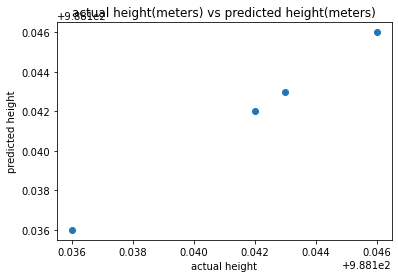

This is the b value [ 0.01941175  0.00288402 -0.01502782  0.01923043  0.0293583   0.01371064
  0.01946735  0.01795902 -0.01988713 -0.01506736  0.00316758  0.03718794
  0.00365534 -0.02615274 -0.03705783 -0.01022212  0.03107098  0.00797899
 -0.00674407 -0.00187173]
This is the m value 915.9507871815277
This is the R^2 1.0


pandas.core.series.Series

In [13]:
#Set up series object for partions in the dataframe
one_Through_Twenty = tzDF["measurements_height"].loc[1:21]
two_Through_Twenty_One= tzDF["measurements_height"].loc[2:22]
three_Through_Twenty_Two =tzDF["measurements_height"].loc[3:23]
four_Through_Twenty_Four = tzDF["measurements_height"].loc[4:24]

#Renaming the series objects
one_Through_Twenty.rename({"measurements_height":"w"},axis =1,inplace=True)
two_Through_Twenty_One.rename({"measurements_height":"x"},axis =1,inplace=True)
three_Through_Twenty_Two.rename({"measurements_height":"y"},axis =1,inplace=True)
four_Through_Twenty_Four.rename({"measurements_height":"z"},axis =1,inplace=True)

#Concating the series objects to one dataframe, result_DF
result_DF = pd.concat([one_Through_Twenty,two_Through_Twenty_One,three_Through_Twenty_Two,four_Through_Twenty_Four],axis=1)
result_DF

#Modefying dataframe by shifting the coulmns up 
result_DF.iloc[:,1] = result_DF.iloc[:,1].shift(-1)
result_DF.iloc[:,2] = result_DF.iloc[:,2].shift(-2)
result_DF.iloc[:,3] = result_DF.iloc[:,3].shift(-3)

#Aligning all coulmns of the data frame together
result_DF = result_DF.dropna()
result_DF = result_DF.transpose()
result_DF

#Linear Regression on all rows and 1-19 coulmns 
lm = LinearRegression()
x = result_DF.iloc[:,0:20]
y = result_DF.iloc[:,20]
lm.fit(x,y)
y_pred1 = lm.predict(x)
plt.scatter(y,y_pred1)
plt.xlabel("actual height")
plt.ylabel("predicted height")
plt.title("actual height(meters) vs predicted height(meters)")
plt.show()
print("This is the b value",lm.coef_,)
print("This is the m value",lm.intercept_)
print("This is the R^2",lm.score(x,y)) 


## Prediction of one point

We 

In [1]:
#Training the first through third rows and all columns
train_x = x.iloc[0:3,:]
train_y = y.iloc[0:3]

#Set up for test data
test_x = x.iloc[3,:]
test_y = y.iloc[3]
test_x = test_x.values.reshape(1,-1)

#Fitting the model 
lm.fit(train_x,train_y)
y_pred2 = lm.predict(test_x)
plt.scatter(test_y,y_pred2)

print("Error of model is",test_y-y_pred2)

NameError: name 'x' is not defined

# Method to increase sample size for model

Method below takes in a dataframe goes into measurment height and get the first through nintenth values in the height dataframe. The first and nintenth value are increased by one a thousand times. The Data frame is transposed made into coulmns then added to an empty list so that it can be concated into a dataframe.

In [15]:
#Making an empty list to store coulmn values
empty_list = []
def make_list(DataFrame):
    i = 0
    for i in range(1000):  
        change = tzDF["measurements_height"].iloc[i+1:i+21].to_frame().transpose()
        #Names of the columns
        change.columns = ["history_1","history_2","history_3","history_4","history_5",
                          "history_6","history_7","history_8","history_9","history_10",
                          "history_11","history_12","history_13","history_14","history_15",
                          "history_16","history_17","history_18","history_19","history_20"]
        change.index = [i]
        empty_list.append(change)
    return empty_list
# List of all columns values 
tzDF_list = make_list(tzDF["measurements_height"])
tzDF_two_list = make_list(tz2DF["measurements_height"])

#List iteration to combine all elements in list
finalDF = pd.concat([m for m in tzDF_list])
finalDF_two =  pd.concat([m for m in tzDF_two_list])
finalDF_two


,history_1,history_2,history_3,history_4,history_5,history_6,history_7,history_8,history_9,history_10,history_11,history_12,history_13,history_14,history_15,history_16,history_17,history_18,history_19,history_20
0,988.206,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147
1,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143
2,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146
3,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142
4,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142,988.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,988.100,988.106,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143
996,988.106,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146
997,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146,988.132
998,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146,988.132,988.133


# Increased data points for linear regression

Below we will take the freshly made data frame finalDF with 200 rows x 20 columns, put the data into a linear regression utilizing the train test split module from the sci kit library. The test sizes of 35,55, and 75 are used for variability.

# 35% Test Data demensration

565   -0.006166
223    0.003142
581   -0.008514
959   -0.001989
974    0.006612
         ...   
260    0.005598
190    0.006416
321    0.000727
886    0.026889
502    0.000966
Name: history_20, Length: 700, dtype: float64
[[1.        0.8193743]
 [0.8193743 1.       ]]


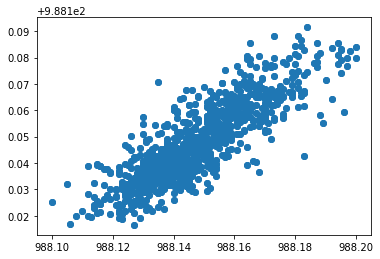

In [16]:

w = finalDF.iloc[:,0:19]
z = finalDF.iloc[:,19]

lm.fit(w,z)
y_pred1 = lm.predict(w)
plt.scatter(z,y_pred1)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.scatter
# x axis is actual height and y is what lm model is predicting in scatter
X_train, X_test, y_train, y_test = train_test_split(w, z, test_size=0.35,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
print(y_test-prediction)
print(np.corrcoef(y_test,prediction))


# 55% Test Data demenstration

In [ ]:
h = finalDF.iloc[:,0:19]
i = finalDF.iloc[:,19]

lm.fit(h,i)
y_pred1 = lm.predict(h)
plt.scatter(i,y_pred1)

X_train, X_test, y_train, y_test = train_test_split(h, i, test_size=0.55,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
print(y_test-prediction)
print(np.corrcoef(y_test,prediction))

# 75% Test Data demenstration

In [ ]:

from sklearn.model_selection import train_test_split

m = finalDF.iloc[:,0:19]
n = finalDF.iloc[:,19]

lm.fit(m,n)
y_pred1 = lm.predict(m)
plt.scatter(n,y_pred1)

X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.75,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
print(y_test-prediction)
print(np.corrcoef(y_test,prediction))




# Use one day's data to predict another day

#change 
The demenstations below utilize the second dataframe now named finalDF_two the December 16, 2020 dates data will be trained to predict the April 17,2020 dates data. The test size increases by ten percent in the for the range of 20-90 for varaibility.

# Prediction from 20%

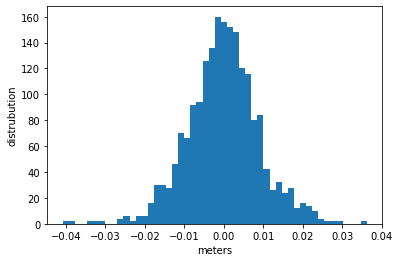

0      0.001454
1      0.005454
2      0.002454
3      0.006454
4      0.012454
         ...   
995    0.005454
996    0.002454
997    0.016454
998    0.015454
999    0.031454
Name: history_20, Length: 2000, dtype: float64


In [18]:

from sklearn.model_selection import train_test_split
# o & p correspond to the 17th
december_Series_X = finalDF.iloc[:,0:19] 
december_Series_Y = finalDF.iloc[:,19]   
april_Series_X = finalDF_two.iloc[:,0:19]  
april_Series_Y = finalDF_two.iloc[:,19]   

lm.fit(december_Series_X,december_Series_Y )
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

X_train, X_test, y_train, y_test = train_test_split(december_Series_X, december_Series_Y, test_size=0.20,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_

model.predict(april_Series_X)[0] - april_Series_Y

 

april_Prediction = model.predict(april_Series_X)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.show()
print(model.predict(april_Series_X)[0] - april_Series_Y)





# Prediction from 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.30,random_state=50)
third_pred_x = finalDF_two.iloc[:,0:19]
third_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(third_pred_x)
model.predict(third_pred_x) - tz2DF["measurements_height"][0]
model.predict(third_pred_x)[0] - third_pred_y

x = model.predict(third_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-third_pred_y,bins = 50)
plt.show()



# Prediction from 40%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.40,random_state=50)
fourth_pred_x = finalDF_two.iloc[:,0:19]
fourth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(fourth_pred_x)

#model.predict(fourth_pred_x)[0] - 
x = model.predict(fourth_pred_x)
plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
#plt.hist(x-fourth_pred_y,bins = 50)
plt.show()


# Prediction from 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.50,random_state=50)
fifth_pred_x = finalDF_two.iloc[:,0:19]
fifth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(fifth_pred_x)
#model.predict(fifth_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(fifth_pred_x)
plt.scatter(x,fifth_pred_y,color="black")
#Distrubution of Errors pred vs actual
#plt.hist(x-fifth_pred_y,bins = 50)
plt.show()


# Prediction from 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.60,random_state=50)
sixth_pred_x = finalDF_two.iloc[:,0:19]
sixth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(sixth_pred_x)
model.predict(sixth_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(sixth_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-sixth_pred_y,bins = 50)
plt.show()



# Prediciton from 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.70,random_state=50)
seventh_pred_x = finalDF_two.iloc[:,0:19]
seventh_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(seventh_pred_x)
model.predict(seventh_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(seventh_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-seventh_pred_y,bins = 50)
plt.show()


# Prediciton from 80%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.80,random_state=50)
eigth_pred_x = finalDF_two.iloc[:,0:19]
eigth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(eigth_pred_x)
model.predict(eigth_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(eigth_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-eigth_pred_y,bins = 50)
plt.show()


# References



Stamps, D. S., Saria, E., Ji, K. H., Jones, J. R., Ntambila, D., Daniels, M. D., &amp; Mencin, D. (2016). <i>Real-time data from the Tanzania Volcano Observatory at the Ol Doinyo Lengai volcano in Tanzania (TZVOLCANO).</i> UCAR/NCAR - EarthCube. https://doi.org/10.5065/D6P849BM